# Matthew Kearney - HW7 CS 559

In [284]:
import numpy as np
import pandas as pd

raw_data = []
with open('hw7_data.txt') as f:
    raw_data = [line.split() for line in f.readlines()]

X = np.array([[float(x), float(y)] for [x, y] in raw_data])
m, n = X.shape
DF = pd.DataFrame(X)
DF.describe()

,0,1
count,1250.000000,1250.000000
mean,-0.135810,-0.018134
std,2.848773,2.860418
min,-5.846103,-5.854869
25%,-2.822421,-2.763320
50%,-0.029687,0.014414
75%,2.577365,2.674518
max,5.453524,5.600143


#### b. [5 pts] By visualizing the data, guess the number of clusters. Justify your answer

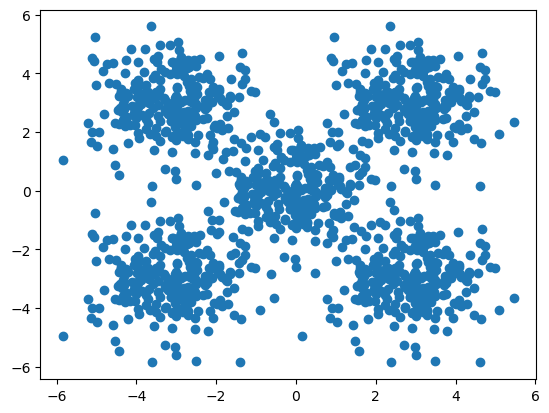

In [285]:
# %matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()



Based on the above scatter plot, it would be fair to predict 5 clusters. Not only are there clearly 5 distinct clusters, but there are 1250 observations meaning each cluster *should* have 250 points. We will use these assumptions later in determining error and accuracy. 

####  c. [15 pts] In the Kmean implementation (KMeans im- do not confuse with Scikit-learn Kmeans), points get clustered by the initial k value the user gives to. However, it does not provide stability (e.g., the optimized total within-cluster variance or inertia). Modify the given algorithm to return the within-cluster variance. Then, visualize how the within-cluster converges as k changes from 1 to 15. Explain which k value is the most appropriate and justify your answer.

In [286]:
import random

def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans_im:

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X_train):

        # Initialize the centroids
        
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
            
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)


            #calculate within-cluster variance`
            cov = []
            for i, cent in enumerate(self.centroids):
                cluster_points = np.array(sorted_points[i])
                if len(cluster_points) > 0:
                    cov.append(np.sum((cluster_points - cent) ** 2) / len(cluster_points))
                else:
                    cov.append(0)  # If a cluster is empty, variance is 0

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1


        return cov

k = 1: W(Ck) = [16.28445754882529]
k = 2: W(Ck) = [9.796866791894706, 9.711820263815676]
k = 3: W(Ck) = [2.9985963781187968, 2.7774687460353253, 9.387381564085395]
k = 4: W(Ck) = [4.006956823367033, 2.704591920424842, 3.4688252761317964, 2.465999763548203]
k = 5: W(Ck) = [1.7240273754623683, 1.9292451895476592, 1.8010779012484839, 1.652375020089125, 1.8518424244627478]
k = 6: W(Ck) = [1.8518424244627478, 1.5762744534017288, 1.7123473522842605, 1.3612648578612971, 1.7555575256343445, 1.4053721587872932]
k = 7: W(Ck) = [1.314519009706979, 1.6999152100800416, 1.3733521596158582, 1.690945879123208, 1.7747336333572123, 1.233266727481672, 1.1905847187139837]
k = 8: W(Ck) = [0.8508191464488416, 1.323681727734116, 1.361552592393355, 1.4846610008636645, 1.9093513731003413, 1.6339300334873992, 0.9336169490390678, 1.0158273260589288]
k = 9: W(Ck) = [1.3238549722794648, 1.2418995013317589, 1.2909092012922374, 0.9874252830000232, 1.2305585927972131, 1.165681570358033, 1.5907350201611354, 1.19721268

c:\Users\mkear\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mkear\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


k = 15: W(Ck) = [0.7192431648808303, 0.7732010422802167, 1.0996259965868391, 1.0559976563286544, 1.0124854921632227, 0.7806208371141409, 0.7246328906912073, 0.5401526392888248, 0.9639053125219732, 0.3024704522570262, 0.9247898820633552, 1.0183510866538967, 0.5913936428133203, 1.1764076303594966, 1.1505560423674612]


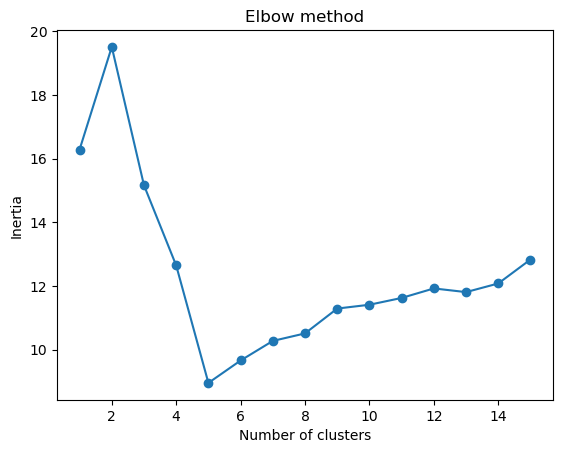

In [287]:
# Fit centroids to dataset
within_class = []
centers = range(1,16)
for i in centers:
    kmeans = KMeans_im(n_clusters=i)
    val = kmeans.fit(X)   
    print(f"k = {i}: W(Ck) = {val}")
    within_class.append(val)
    

def inertias_scalar(inertia):
    vals = []
    for i in inertia:
        if type(i)==list:
            vals.append(np.sum(i))
        else: 
            vals.append(i)
    return vals


        
plt.plot(centers, inertias_scalar(within_class), marker='o')

plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the above elbow method graph, we can be sure that the optimal number of cluster is at k = 5. K increases from 1 to 2, and then decreases steadily from 2 to 5. When x is at 5, we reach the 'elbow' where the y-values thereafter begin getting higher and higher. Thus, we can say that the optimal number of clusters is at the elbow and after the most significant decrease(s) at k =5.

#### d. [15 pts] Run the train gmm algorithm (the implemented Gaussian Mixture algorithm) to check if the k value answered in (c.) is a good choice. Visualize the change of log-likelihood as k increases from 1 to 15. Then, compare the visualization of clusters with KMeans results from (c.). Explain how results are similar and different.

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15


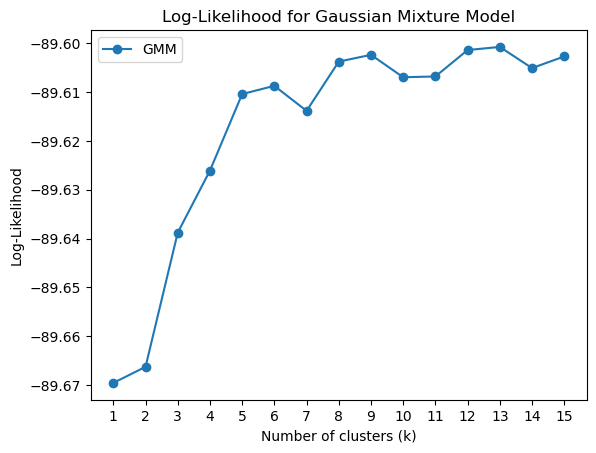

In [316]:

def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters, n_init=100).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'pi_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters


def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
    
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)




def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    likelihood = np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)* np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)
    return likelihood

def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood 
        
        if(i == 49):
            print('\tEpoch: ', i + 1, 'Likelihood: ', likelihood)

    scores = np.log(gamma_nk)
    
    return clusters, likelihoods, scores, sample_likelihoods, history

def MinMaxScaler(data):
    # minimum / maximum 
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    
    
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    
    return scaled_data

centers = range(1,16) # n_clusters = 5
gmm_likelys = []
X_scaled = MinMaxScaler(X)
for k in centers: 
    print(f"k: {k}")
    clusters, likelihoods, _, _, _ = train_gmm(X_scaled, k, n_epochs=10)
    gmm_likelys.append(likelihoods[-1]) #take the last one 

    # log-likelihood plot
plt.plot(centers, gmm_likelys, marker='o', label='GMM')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood for Gaussian Mixture Model')
plt.xticks(centers)
plt.legend()
plt.show()

The suggested k-value from the above graph of log-likelihood against the number of clusters, we can see convergence at k=5 as well. From k = 5 to k = 6b there is very negligible incline after the series of major increases in likelihood. From the graph above however, log-likelihood continues to fluctuate after k = 6. In particular, at k = 9 it is possible to see that we achieve our lowest log-likelihood. This suggests that although k = 9 may be able to fit the data, it is not the most characterstic-identifying clustering possible as is seen at k = 5. 

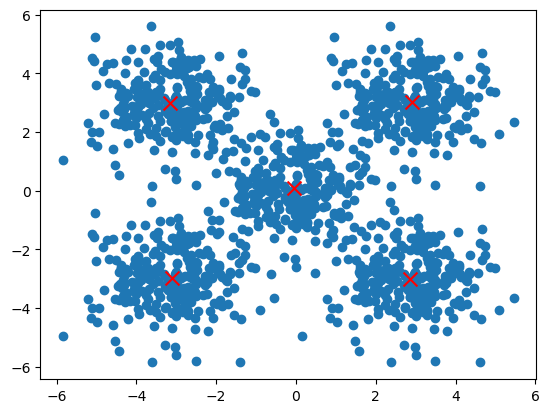

array([[ 2.91333493,  3.03670412],
       [-3.10056653, -2.98827297],
       [ 2.86521229, -3.02429106],
       [-3.14888955,  3.00012049],
       [-0.06381042,  0.07786589]])

In [289]:
k5 = KMeans_im(n_clusters=5)
within_cl_variance= k5.fit(X)
mu =  k5.centroids

av = []

for i in mu: 
    av.append(i.tolist())


av = np.array(av)

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(av[:,0], av[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.show()

av




	Epoch:  50 Likelihood:  226.29402571670266


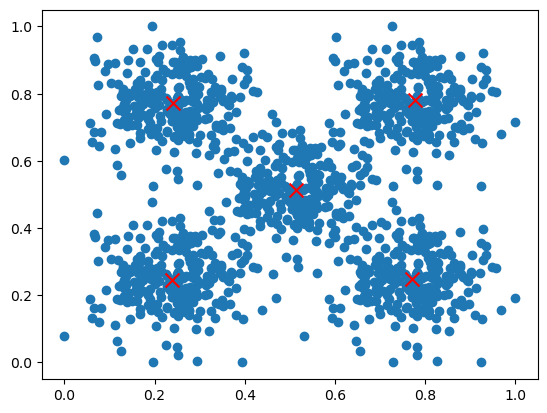

array([[0.23821304, 0.24663528],
       [0.51302231, 0.51399553],
       [0.77094959, 0.24804665],
       [0.241061  , 0.77173048],
       [0.77778863, 0.78127371]])

In [290]:
k =5 
clusters, likelihoods, scores, sample_likelyhood, history = train_gmm(X_scaled, k, n_epochs=100)
mu = []
for i in clusters:
    mu.append(i['mu_k'].tolist())

mu = np.array(mu)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

plt.scatter(mu[:,0], mu[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.show()
mu

The primary clear difference between the Kmeans and the Gaussian mixture model is the difference in domain. The kmeans plot is in the domain space of the original data whereas the gaussian mixture has been normalized into the feature domain of (0,1) for both. Besides this, the most notable differnce is the very lengthy computational time, resource requirement by the Gaussian mixture. The Gaussian mixture has time complexity O(NK(D**3)), whereas the kmeans model has runtime O(NKD). This makes the Gaussian mixture model much less desirable as we implement clustering algorithms unless using probability and normalized values is more desirable. Though we have our data on different scales, we can see that they both approximately reach the true centroid of the clusters. 

https://stats.stackexchange.com/questions/89229/run-time-analysis-of-the-clustering-algorithm-k-means
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4596621/#:~:text=Its%20time%20complexity%20is%20of,D%20is%20the%20problem%20dimension.


a. [10 pts] In the lecture, the algorithm of PCA and the scikit-learn example are discussed.
 Implement the PCA algorithm using NumPy.

assume linearity b/w points

maximize(Var(Zi)) subject to ||u^||=1

when correct principal direction is found, variance of the principal component (Var(Z1) = X.T * $\phi_{1}$)

$$
X_k =  X - \sum_{i=1}^{k-1} X \phi_i \phi_i^{T}.
$$

after projecting point Z =  X.T * $\phi_{1}$, maximize Var(Z)...

In [310]:
cov = np.cov(X, rowvar=False)
# cov

from numpy.linalg import eig
w,v=eig(cov)
print("w: ",  w, "\n", "v: ", v)


w:  [8.11535809 8.18213746] 
 v:  [[-0.99888883  0.04712862]
 [-0.04712862 -0.99888883]]


Our eigenvectors are *essentially* the same as our var(x), var(y). We will use the eigenvector associated with max(w) s.t we have the greatest spread in our new projection space and carry over the most information. Above we can see the principal component directions. 

In [311]:
eigv = v[1]

# i = np.argsort(w)[::-1]  # sort
# eigenvalues = w[i]
# eigenvectors = v[:, i]

var_z1 = np.dot(X, eigv)
var_z1



array([-0.21427605, -0.42772528,  0.15751723, ..., -3.01923344,
       -1.57682904, -0.58162705])